<a href="https://colab.research.google.com/github/AlexandraMihalevschi/Data_Science/blob/main/Model_de_predic%C8%9Bie_p_u_Concurs_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mai întâi este nevoie să importăm datele și restul de ce avem nevoie

In [ ]:
import pandas as pd

In [ ]:
movies = pd.read_csv('https://girlsgoitpublic.z6.web.core.windows.net/movies_train.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
movies

,movie_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,budget,usa_gross_income,worlwide_gross_income,popularity
0,0,Suéltate el pelo,Suéltate el pelo,1988,1988-07-13,"Comedy, Musical",100,Spain,Spanish,Manuel Summers,"Francisco Summers, Manuel Summers",Francisco Lara Polop P.C.,"David Summers, Daniel Mezquita, Rafael Gutiérr...",NaN,NaN,NaN,NaN,unpopular
1,1,Mister Johnson,Mister Johnson,1990,1991-06-14,Drama,101,USA,English,Bruce Beresford,"William Boyd, Joyce Cary",Avenue Pictures,"Maynard Eziashi, Pierce Brosnan, Edward Woodwa...","In 1923, a local resident of British Colonial ...",NaN,$ 1464242,$ 1464242,popular
2,2,Gelosia,Wife vs. Secretary,1936,1936-02-28,"Comedy, Drama, Romance",88,USA,English,Clarence Brown,"Norman Krasna, John Lee Mahin",Metro-Goldwyn-Mayer (MGM),"Clark Gable, Jean Harlow, Myrna Loy, May Robso...",The wife of a publishing executive mistakenly ...,$ 519000,NaN,NaN,popular
3,3,Uno sbirro nella notte,Killing Blue,1988,1988-11-03,Thriller,95,West Germany,"English, German",Peter Patzak,"Julia Kent, Paul Nicholas",K.S. Film,"Armin Mueller-Stahl, Morgan Fairchild, Frank S...",Police Commissioner Alex Glass has been twiste...,NaN,NaN,NaN,unpopular
4,4,"Ride, Ranger, Ride","Ride, Ranger, Ride",1936,1936-09-30,Western,63,USA,English,Joseph Kane,"Dorrell McGowan, Stuart E. McGowan",Republic Pictures (I),"Gene Autry, Smiley Burnette, Kay Hughes, Monte...",Gene is a Texas Ranger working under cover to ...,NaN,NaN,NaN,unpopular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75850,75850,Venom,Venom,2005,2005-09-16,Horror,87,USA,English,Jim Gillespie,"Flint Dille, John Zuur Platten",Dimension Films,"Agnes Bruckner, Jonathan Jackson, Laura Ramsey...",A group of teenagers fear for their lives in t...,NaN,$ 881779,$ 881779,unpopular
75851,75851,Chorabali,Chorabali,2016,2016-01-22,"Drama, Mystery, Thriller",108,India,"Bengali, English",Subhrajit Mitra,Agatha Christie,Angel Digital Private Limited,"Barun Chanda, Tanushree Chakraborty, George Ba...",A whodunit thriller set in the backdrop of Nor...,NaN,NaN,NaN,unpopular
75852,75852,Smugglers' Cove,Smugglers' Cove,1948,1948-10-10,"Comedy, Crime",66,USA,English,William Beaudine,"Edmond Seward, Tim Ryan",Monogram Pictures,"Leo Gorcey, Huntz Hall, Gabriel Dell, Martin K...",Slip mistakenly believes that he has inherited...,NaN,NaN,NaN,popular
75853,75853,I cacciatori dell'oro,The Spoilers,1942,1942-06-11,"Drama, Western",87,USA,English,Ray Enright,"Rex Beach, Lawrence Hazard",Universal Pictures,"Marlene Dietrich, Randolph Scott, John Wayne, ...","In Nome, Alaska, miner Roy Glennister and his ...",NaN,NaN,NaN,popular


In [ ]:
mov = movies.dropna()
mov['year'] = mov['year'].astype('int')
mov

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,movie_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,budget,usa_gross_income,worlwide_gross_income,popularity
42,42,Scary Movie 3 - Una risata vi seppellirà,Scary Movie 3,2003,2004-02-20,"Comedy, Horror",84,"USA, Canada",English,David Zucker,"Craig Mazin, Pat Proft",Dimension Films,"Pamela Anderson, Jenny McCarthy, Marny Eng, Ch...",Cindy must investigate mysterious crop circles...,$ 48000000,$ 110003217,$ 220673217,unpopular
55,55,La nobildonna e il duca,L'Anglaise et le duc,2001,2001-09-07,"Drama, History, Romance",129,"France, Germany",French,Éric Rohmer,"Grace Elliott, Éric Rohmer",Pathé Image Production,"Jean-Claude Dreyfus, Lucy Russell, Alain Libol...","During the French Revolution, a Scottish arist...",FRF 39000000,$ 331051,$ 1128137,popular
72,72,Hav Plenty,Hav Plenty,1997,1998-06-19,Comedy,92,USA,English,Christopher Scott Cherot,Christopher Scott Cherot,Edmonds Entertainment Group (EEG),"Christopher Scott Cherot, Chenoa Maxwell, Tamm...",Lee Plenty is an almost broke would-be novelis...,$ 650000,$ 2284034,$ 2284034,popular
79,79,Mai con uno sconosciuto,Never Talk to Strangers,1995,1995-11-17,"Crime, Drama, Romance",86,"USA, Canada, Germany",English,Peter Hall,"Lewis A. Green, Jordan Rush",TriStar Pictures,"Rebecca De Mornay, Antonio Banderas, Dennis Mi...","Sarah Taylor, a criminal psychologist, embarks...",$ 6400000,$ 6858261,$ 6858261,unpopular
82,82,Nei panni di una bionda,Switch,1991,1991-05-10,"Comedy, Fantasy",103,USA,English,Blake Edwards,Blake Edwards,Beco Films,"Ellen Barkin, Jimmy Smits, JoBeth Williams, Lo...",A sexist womanizer is killed by one of his for...,$ 14000000,$ 15545943,$ 15545943,unpopular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75781,75781,Il cigno nero,Black Swan,2010,2011-02-18,"Drama, Thriller",108,USA,"English, French, Italian",Darren Aronofsky,"Mark Heyman, Andres Heinz",Fox Searchlight Pictures,"Natalie Portman, Mila Kunis, Vincent Cassel, B...",A committed dancer struggles to maintain her s...,$ 13000000,$ 106954678,$ 329398046,popular
75799,75799,I tre moschettieri,The Three Musketeers,1993,1994-02-25,"Action, Adventure, Comedy",105,"Austria, UK, USA",English,Stephen Herek,"Alexandre Dumas, David Loughery",Walt Disney Pictures,"Charlie Sheen, Kiefer Sutherland, Chris O'Donn...","France, 1625: Young d'Artagnan heads to Paris ...",$ 30000000,$ 53898845,$ 53898845,popular
75817,75817,L'ultimo contratto,Grosse Pointe Blank,1997,1997-06-13,"Action, Comedy, Crime",107,USA,English,George Armitage,"Tom Jankiewicz, Tom Jankiewicz",Hollywood Pictures,"John Cusack, Minnie Driver, Alan Arkin, Dan Ay...",Martin Blank is a professional assassin. He is...,$ 15000000,$ 28084357,$ 28084357,popular
75820,75820,The Walk,The Walk,2015,2015-10-22,"Adventure, Biography, Drama",123,USA,"English, French, Czech",Robert Zemeckis,"Robert Zemeckis, Christopher Browne",Sony Pictures Entertainment (SPE),"Joseph Gordon-Levitt, Guillaume Baillargeon, É...","In 1974, high-wire artist Philippe Petit recru...",$ 35000000,$ 10137502,$ 61181942,popular


In [ ]:
parameters = ['year', 'duration']

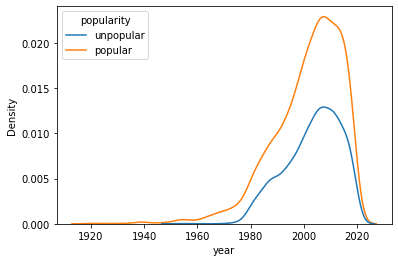

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data=mov, x='year', hue="popularity")

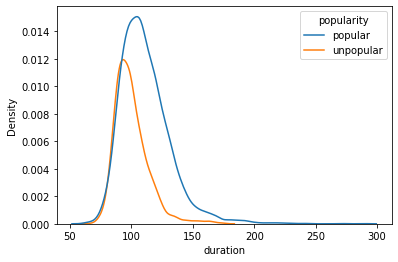

In [ ]:
sns.kdeplot(data=mov, x='duration', hue="popularity")

In [ ]:
X = mov[parameters]
y = mov['popularity']

In [ ]:
mov = mov.sample(frac=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')  

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


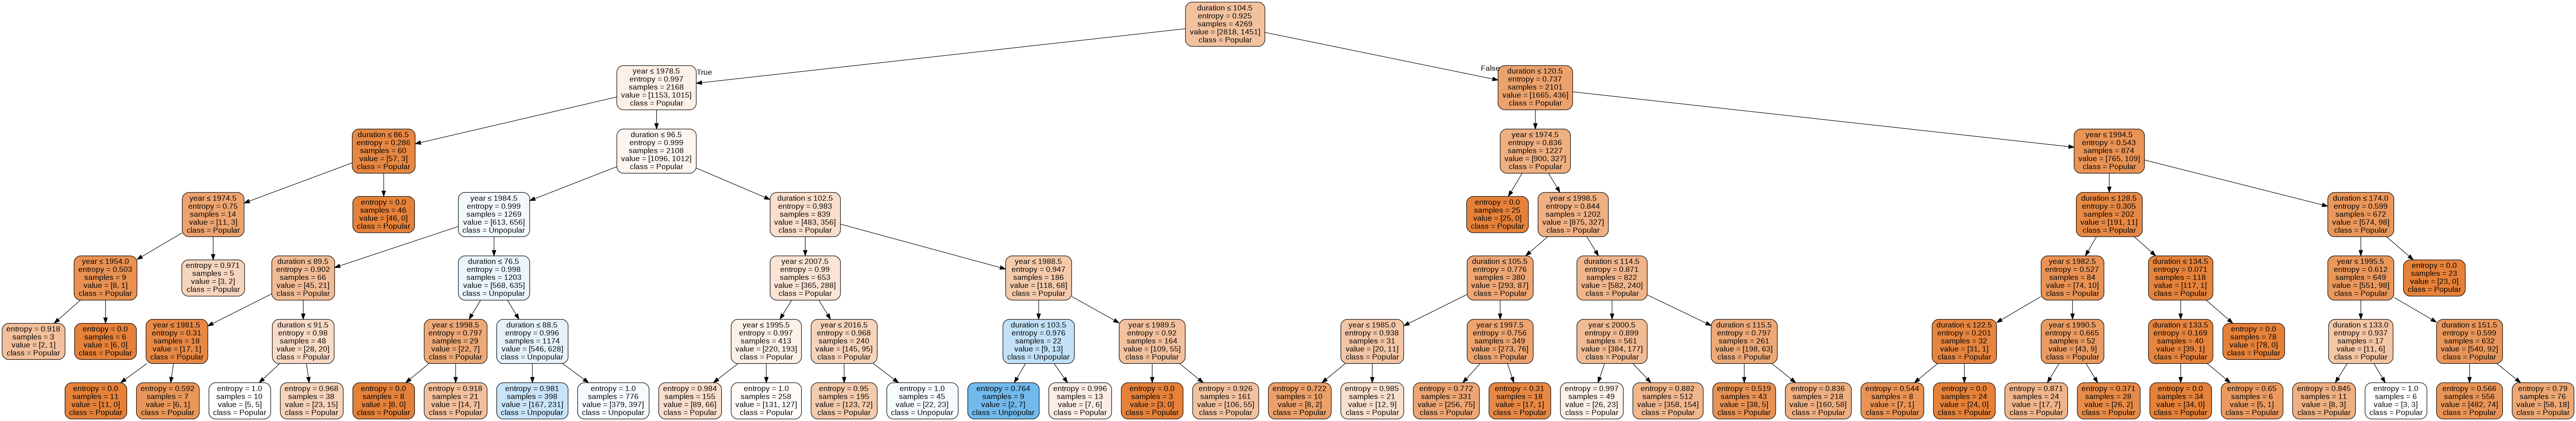

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,
                class_names=['Popular' ,'Unpopular'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [ ]:
y_predict = clf.predict(X_test)

In [ ]:
y_predict

array(['unpopular', 'popular', 'popular', ..., 'popular', 'popular',
       'popular'], dtype=object)

In [ ]:
y_test

47317      popular
37065      popular
68943      popular
69810      popular
62749      popular
           ...    
32375    unpopular
46635      popular
52954      popular
36148      popular
16183      popular
Name: popularity, Length: 2847, dtype: object

In [ ]:
df_test_predict = pd.DataFrame({'y_test': y_test, 'y_predict' : y_predict})
df_test_predict

,y_test,y_predict
47317,popular,unpopular
37065,popular,popular
68943,popular,popular
69810,popular,unpopular
62749,popular,popular
...,...,...
32375,unpopular,unpopular
46635,popular,popular
52954,popular,popular
36148,popular,popular


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [ ]:
accuracy_score(y_test, y_predict)

0.6772040744643484

In [ ]:
precision_score(y_test, y_predict, pos_label='popular')

0.7390873015873016

In [ ]:
recall_score(y_test, y_predict, pos_label='popular')

0.7912904938927243

In [ ]:
f1_score(y_test, y_predict, pos_label='popular')

0.7642985380866889

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
conf_mx = confusion_matrix(y_test, y_predict)

(array([0.5, 1.5]), <a list of 2 Text major ticklabel objects>)

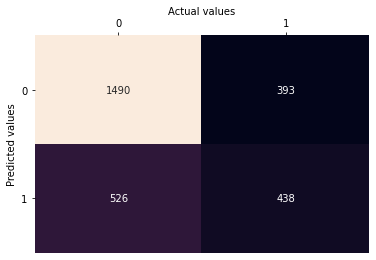

In [ ]:
ax = sns.heatmap(conf_mx, annot=True, fmt="d", cbar=False)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.set_xlabel('Actual values')
ax.set_ylabel('Predicted values')
plt.yticks(rotation=0)

In [ ]:
y_train_predict = clf.predict(X_train)

In [ ]:
accuracy_score(y_train, y_train_predict)

0.6807214804403842

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
acc = cross_val_score(clf, X, y, cv = 5, scoring='accuracy')
print(acc)
print()
print('Mean:', acc.mean())
print()
print('Std:', acc.std())

[0.66853933 0.67322558 0.66408995 0.66900914 0.66408995]

Mean: 0.6677907885698043

Std: 0.0034343568007482845




---



---



In [ ]:
test = pd.read_csv('https://girlsgoitpublic.z6.web.core.windows.net/movies_test.csv')

In [ ]:
test

,movie_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,budget,usa_gross_income,worlwide_gross_income
0,0,Familia,Familia,2005,2006-08-09,Drama,102,Canada,French,Louise Archambault,Louise Archambault,micro_scope,"Sylvie Moreau, Macha Grenon, Juliette Gosselin...",This emotionally-charged story of mothers and ...,NaN,NaN,$ 2365
1,1,Macondo,Macondo,2014,2014-11-14,Drama,98,Austria,"German, Chechen, Arabic",Sudabeh Mortezai,Sudabeh Mortezai,FreibeuterFilm,"Ramasan Minkailov, Aslan Elbiev, Kheda Gazieva...",An 11-year-old Chechnyan refugee living in Vie...,NaN,NaN,$ 46300
2,2,Miles from Home,Miles from Home,2006,2006-02-01,Drama,97,USA,English,Ty Hodges,Ty Hodges,Lab 601,"Erik Aude, Taisha Monique Clark, Amy Correa, M...","Plagued by bad influences, bad choices and bad...",NaN,NaN,NaN
3,3,Maz swojej zony,Maz swojej zony,1961,1961-04-04,Comedy,94,Poland,Polish,Stanislaw Bareja,"Stanislaw Bareja, Jerzy Jurandot",P.P. Film Polski,"Bronislaw Pawlik, Aleksandra Zawieruszanka, Mi...",NaN,NaN,NaN,NaN
4,4,Marutai no onna,Marutai no onna,1997,1997-09-27,"Comedy, Crime, Drama",131,Japan,Japanese,Jûzô Itami,Jûzô Itami,Itami Productions,"Nobuko Miyamoto, Masahiko Nishimura, Yuji Mura...",A vain actress who witnessed a serious crime i...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,The Unseen,The Unseen,2005,2005-09-24,Drama,99,USA,English,Lisa France,Lisa France,Luis Moro Productions,"Steve Harris, Gale Harold, Phillip Bloch, Cath...",A film by Lisa France. A Luis Moro Production....,NaN,NaN,NaN
9996,9996,Duplicity,Duplicity,2009,2009-04-10,"Comedy, Crime, Romance",125,"USA, Germany","English, Spanish, Russian, German",Tony Gilroy,Tony Gilroy,Universal Pictures,"Clive Owen, Julia Roberts, Tom Wilkinson, Paul...",Two ex-government agents turned rival industri...,$ 60000000,$ 40572825,$ 78176181
9997,9997,Mektup,Mektup,1997,1997-09-26,Drama,100,Turkey,Turkish,Ali Özgentürk,Ali Özgentürk,NaN,"Tarik Akan, Necdet Mahfi Ayral, Ihsan Bilsel, ...",A man researches the death of his political ac...,NaN,NaN,NaN
9998,9998,Il matrimonio che vorrei,Hope Springs,2012,2012-10-18,"Comedy, Drama, Romance",100,"USA, Canada",English,David Frankel,Vanessa Taylor,Columbia Pictures,"Meryl Streep, Tommy Lee Jones, Steve Carell, J...","After thirty years of marriage, a middle-aged ...",$ 30000000,$ 63536011,$ 114281051


In [ ]:
X_test = test[['year', 'duration']]
X_test

,year,duration
0,2005,102
1,2014,98
2,2006,97
3,1961,94
4,1997,131
...,...,...
9995,2005,99
9996,2009,125
9997,1997,100
9998,2012,100


In [ ]:
y_predict = clf.predict(X_test)

In [ ]:
y_predict

array(['popular', 'popular', 'popular', ..., 'popular', 'popular',
       'unpopular'], dtype=object)

In [ ]:
test_predict = pd.DataFrame({'movie_id': test['movie_id'], 'popularity' : y_predict})
test_predict

,movie_id,popularity
0,0,popular
1,1,popular
2,2,popular
3,3,popular
4,4,popular
...,...,...
9995,9995,popular
9996,9996,popular
9997,9997,popular
9998,9998,popular


In [ ]:
test_predict.to_csv('IMDb_movies_predict.csv', index = False)